# Keystroke Dynamics

The datasets:

*   http://www3.cs.stonybrook.edu/~rbanerjee/project-pages/keystrokes/keystrokes.html


In [1]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import os
import tabulate
import seaborn as sns
sns.set()

In [2]:
alt.data_transformers.enable('default', max_rows=None) 
# alt.renderers.enable('default')
# alt.renderers.enable('notebook')

DataTransformerRegistry.enable('default')

# 1. Data Preparation

In [3]:
# Save temp altair json files in separate folder
os.makedirs('tmp/altdata', exist_ok=True)

def custom(data):
    return alt.pipe(data, alt.to_json(filename='tmp/altdata/{prefix}-{hash}.{extension}') )

alt.data_transformers.register('custom', custom)
alt.data_transformers.enable('custom')

DataTransformerRegistry.enable('custom')

### ! Before executing this code, make sure you've downloaded the datasets by the link and unpacked csv files to `data` directory

In [4]:
files = ('data/ReviewAMT_500_t.csv', 'data/GayMarriage_400.csv', 'data/GunControl_400.csv')
df_atm = pd.read_csv(files[0], sep='\t')
df_gay = pd.read_csv(files[1], sep='\t')
df_gun = pd.read_csv(files[2], sep='\t')

In [5]:
df_atm.rename(columns = {'ReviewTopic': 'Topic'}, inplace=True)
df_atm['Task'] = df_atm['Task'].map(
    {
        "Fake Review": 'fake', 
        "True Review": 'true',
        'Copy_1': 'copy_1',
        'Copy_2': 'copy_2'
    }) 
df_atm.head(3)

,UserName,AccessKey,ReviewDate,Topic,Task,Group,Flow,Restaurant,Addr,Site,ReviewText,ReviewMeta
0,A002160837SWJFPIAI7L7,392aa3e372054948a5cabd637b2e239b,Sun Jun 02 20:55:38 UTC 2013,AMT,copy_1,AMT,TF,NaN,NaN,NaN,Famous Daves is a good place to go for some go...,0 MouseUp 0 0;535 KeyDown 16;776 KeyDown 70;79...
1,A002160837SWJFPIAI7L7,392aa3e372054948a5cabd637b2e239b,Sun Jun 02 20:58:33 UTC 2013,AMT,copy_2,AMT,TF,NaN,NaN,NaN,The Original Shrimp Place is a good place to c...,0 MouseUp 0 0;491 KeyDown 16;778 KeyDown 84;82...
2,A002160837SWJFPIAI7L7,392aa3e372054948a5cabd637b2e239b,Sun Jun 02 20:53:01 UTC 2013,AMT,fake,AMT,TF,The Original Shrimp Place,NaN,NaN,The Original Shrimp Place is a good place to c...,0 MouseUp 0 0;849 KeyDown 16;966 KeyDown 84;10...


In [6]:
df_gay['Task'] = df_gay['Task'].map(
    {
        "Fake Essay": 'fake', 
        "True Essay": 'true',
        'Copy_1': 'copy_1',
        'Copy_2': 'copy_2'
    }) 
df_gay.head(3)

,UserName,AccessKey,Topic,Opinion,ReviewDate,ReviewType,Task,Group,Flow,ReviewText,ReviewMeta
0,A12WI1MRO70881,81a90739642349eb8f130f4e8f5e8deb,Gay Marriage,support,Thu May 30 04:08:13 UTC 2013,AMT,copy_1,AMT,FT,Gay Marriage is an oxymoron even as a concept....,0 MouseUp 0 0;878 MouseUp 0 0;1691 MouseUp 0 0...
1,A12WI1MRO70881,81a90739642349eb8f130f4e8f5e8deb,Gay Marriage,support,Thu May 30 04:14:38 UTC 2013,AMT,copy_2,AMT,FT,Marriage is about love and commitment. Its a ...,0 MouseUp 0 0;762 KeyDown 16;1160 KeyDown 77;1...
2,A12WI1MRO70881,81a90739642349eb8f130f4e8f5e8deb,Gay Marriage,support,Thu May 30 03:44:09 UTC 2013,AMT,fake,AMT,FT,Gay Marriage is an oxymoron even as a concept....,0 MouseUp 0 0;860 MouseUp 0 0;1722 MouseUp 0 0...


In [7]:
df_gun['Task'] = df_gun['Task'].map(
    {
        "Fake Essay": 'fake', 
        "True Essay": 'true',
        'Copy_1': 'copy_1',
        'Copy_2': 'copy_2'
    }) 
df_gun.head(3)

,UserName,AccessKey,Topic,Opinion,ReviewDate,ReviewType,Task,Group,Flow,ReviewText,ReviewMeta
0,A10E8QHPV30BAD,0102f02e052a473f8b5a87f42a9f6c13,Gun Control,oppose,Sat Jun 15 14:09:11 UTC 2013,AMT,copy_1,AMT,FT,I strongly support gun control being strongly ...,0 MouseUp 0 0;5309 KeyDown 16;5453 KeyDown 73;...
1,A10E8QHPV30BAD,0102f02e052a473f8b5a87f42a9f6c13,Gun Control,oppose,Sat Jun 15 14:11:57 UTC 2013,AMT,copy_2,AMT,FT,I strongly oppose gun control as I believe it ...,0 MouseUp 0 0;874 KeyDown 16;946 KeyDown 73;10...
2,A10E8QHPV30BAD,0102f02e052a473f8b5a87f42a9f6c13,Gun Control,oppose,Sat Jun 15 14:01:32 UTC 2013,AMT,fake,AMT,FT,I strongly support gun control being strongly ...,0 MouseUp 0 0;5023 KeyDown 91;5517 KeyDown 91;...


### Lets concat three datasets and leave only 5 columns

In [8]:
datasets = (df_atm, df_gay, df_gun)
df = pd.concat(
    (dataset[[
        'UserName', 
        'AccessKey', 
        'Topic', 
        'Task',
        'ReviewText', 
        'ReviewMeta'
    ]] for dataset in datasets),
    ignore_index=True)
df.head()

,UserName,AccessKey,Topic,Task,ReviewText,ReviewMeta
0,A002160837SWJFPIAI7L7,392aa3e372054948a5cabd637b2e239b,AMT,copy_1,Famous Daves is a good place to go for some go...,0 MouseUp 0 0;535 KeyDown 16;776 KeyDown 70;79...
1,A002160837SWJFPIAI7L7,392aa3e372054948a5cabd637b2e239b,AMT,copy_2,The Original Shrimp Place is a good place to c...,0 MouseUp 0 0;491 KeyDown 16;778 KeyDown 84;82...
2,A002160837SWJFPIAI7L7,392aa3e372054948a5cabd637b2e239b,AMT,fake,The Original Shrimp Place is a good place to c...,0 MouseUp 0 0;849 KeyDown 16;966 KeyDown 84;10...
3,A002160837SWJFPIAI7L7,392aa3e372054948a5cabd637b2e239b,AMT,true,Famous Daves is a good place to go for some go...,0 MouseUp 0 0;6347 KeyDown 16;6443 KeyDown 70;...
4,A0436270XG2E3RS5T61O,2746b106ea6e42efb6104f45d6b2360c,AMT,copy_1,"Being a big admirer of Italian food, I conside...",0 MouseUp 0 0;597 KeyDown 17;1093 KeyDown 17;1...


### As a result, we have 1060 unique users:

In [9]:
len(df['UserName'].unique())

1060

In [10]:
len(df['AccessKey'].unique())

1300

### Lets save the data into file

In [12]:
# df.to_csv(r'data/merged_datasets.csv', sep='\t')

# 2. Data Investigation

In [11]:
df['ReviewMeta'][59][0:400]

'0 MouseUp 0 0;16705 KeyDown 16;17170 KeyDown 16;17200 KeyDown 16;17229 KeyDown 16;17258 KeyDown 16;17287 KeyDown 16;17317 KeyDown 16;17346 KeyDown 16;17375 KeyDown 16;17404 KeyDown 16;17433 KeyDown 16;17463 KeyDown 16;17492 KeyDown 16;17521 KeyDown 16;17552 KeyDown 16;17580 KeyDown 16;17609 KeyDown 16;17630 KeyDown 73;17717 KeyUp 73;17925 KeyUp 16;18397 KeyDown 32;18528 KeyUp 32;18567 KeyDown 87;1'

### We will build two datasets: `df_dwells` and `df_transitions`. 

`dwells` will hold the times between each `KeyDown` and `KeyUp` events. 
The `transitions` dataset will represent `time` measure ('down-down time') – the time between previous key was down till the next key is down. (always positive).

In [12]:
def process_keystroke(line):
    res = line.split(' ')
    if len(res) > 3:
        return f'UNKNOWN: {line}'
    
    time, command, key = res
    return (time, command, key, chr(int(key)))

def code_to_str(keycode):
    keycode = int(keycode)
    mappings = {
        16: 'shift',
        8: 'backspace',
        32: 'space'
    }
    return mappings.get(keycode, chr(keycode))

vcode_to_str = np.vectorize(code_to_str)

def process_keystrokes(inputs, user_id, attempt_id, task_name):
    def data_row(time, code):
        return [ user_id,  time,  command,  code, attempt_id, task_name ]
    
    def dwell_row(time, code):
        return [ user_id,  time,  code, attempt_id, task_name ] 
    
    def transition_row(time, code1, code2):
        return [ user_id,  time,  code1, code2, attempt_id, task_name ]
            
    MOUSE_UP = 'MouseUp'
    KEY_DOWN = 'KeyDown'
    KEY_UP = 'KeyUp'
    result = []
    dwells = []
    transitions = []
    key_downs = {}
    key_ups = {}
    attempt_id = int(attempt_id)
    last_key_up = None
    last_key_down = None
    
    for keystroke in inputs.split(';'):
        res = keystroke.split(' ')
        
        if len(res) < 3:
            continue
            
        if res[1] == 'MouseUp':
            continue

        time, command, code = res
        time = int(time)
        code = int(code)
        
        if command == KEY_DOWN:
            key_downs[code] = time
            
            if last_key_down:
                last_down_code, last_down_time = last_key_down
                timeshift = time - last_down_time 
                transitions.append(transition_row(timeshift, last_down_code, code))
                
            last_key_down = [code, time]
            
        if command == KEY_UP:
            if code in key_downs:
                timeshift = time - key_downs[code]
                dwells.append(dwell_row(timeshift, code))
                del key_downs[code]
                last_key_up = [code, time]
            
        result.append(data_row(time, code))
        
    return result, dwells, transitions

vprocess_keystrokes = np.vectorize(process_keystrokes)

def process_data(df):
    results = []
    dwell_data = []
    transitions_data = []
    columns = ['user_id', 'time', 'command', 'code', 'attempt_id', 'task_name']
    for index, inputs in df.iterrows():
        all_keystrokes, dwells, transitions  = process_keystrokes(
            inputs['ReviewMeta'], 
            inputs['UserName'], 
            index, 
            inputs['Task']
        )
        results.extend(all_keystrokes)
        dwell_data.extend(dwells)
        transitions_data.extend(transitions)
    return \
        pd.DataFrame(dwell_data, columns=['user_id', 'time', 'code', 'attempt_id', 'task_name']), \
        pd.DataFrame(results, columns=['user_id', 'time', 'command', 'code', 'attempt_id', 'task_name']), \
        pd.DataFrame(transitions_data, columns=['user_id', 'time', 'code_from', 'code_to', 'attempt_id', 'task_name']) 

In [13]:
df_dwells_raw, df_all_raw, df_transitions_raw = process_data(df)
df_dwells_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4568673 entries, 0 to 4568672
Data columns (total 5 columns):
user_id       object
time          int64
code          int64
attempt_id    int64
task_name     object
dtypes: int64(3), object(2)
memory usage: 174.3+ MB


In [14]:
df_dwells_raw.head(3)

,user_id,time,code,attempt_id,task_name
0,A002160837SWJFPIAI7L7,260,16,0,copy_1
1,A002160837SWJFPIAI7L7,192,70,0,copy_1
2,A002160837SWJFPIAI7L7,127,65,0,copy_1


### Now, add a human interperation of the key code

In [15]:
df_all_raw['key'] = vcode_to_str(df_all_raw['code'])

In [16]:
df_all_raw.head()

,user_id,time,command,code,attempt_id,task_name,key
0,A002160837SWJFPIAI7L7,535,KeyDown,16,0,copy_1,shift
1,A002160837SWJFPIAI7L7,776,KeyDown,70,0,copy_1,F
2,A002160837SWJFPIAI7L7,795,KeyUp,16,0,copy_1,shift
3,A002160837SWJFPIAI7L7,924,KeyDown,65,0,copy_1,A
4,A002160837SWJFPIAI7L7,968,KeyUp,70,0,copy_1,F


In [17]:
df_dwells = df_dwells_raw.loc[(df_dwells_raw['time'] > 0) & (df_dwells_raw['time'] < 300)]

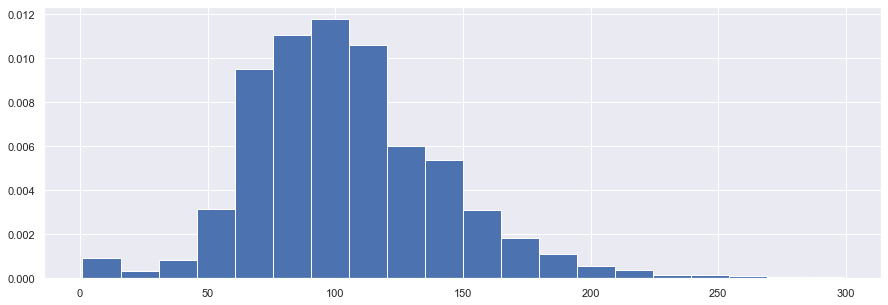

In [18]:
# alt.Chart(df_dwells).mark_bar().encode(
#     alt.X("time:Q", bin=alt.Bin(maxbins=50), axis=alt.Axis(title='Time (ms)')),
#     y=alt.Y('count()', axis=alt.Axis(title=None))
# ).transform_filter(
#     'datum.time > 0 & datum.time < 300'
# ).properties(
#     width=800, title='Dwells time distribution'
# )
plt.figure(figsize=(15, 5))

plt.hist(df_dwells['time'], bins=20, density=True)
plt.show()

In [19]:
df_transitions = df_transitions_raw.loc[(df_transitions_raw['time'] > 0) & (df_transitions_raw['time'] < 1000)]

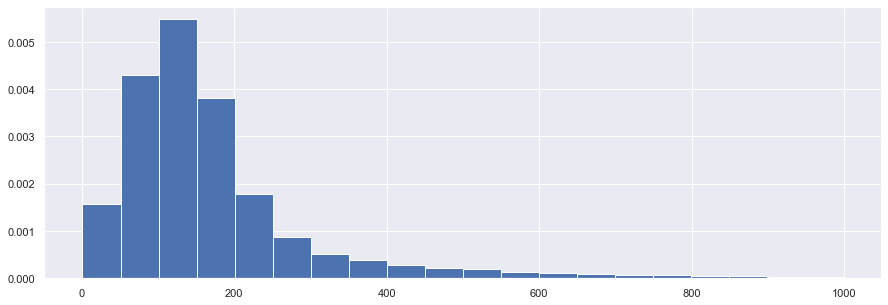

In [20]:
# alt.Chart(df_transitions).mark_bar().encode(
#     alt.X("time:Q", bin=alt.Bin(maxbins=50), axis=alt.Axis(title='Time (ms)')),
#     y=alt.Y('count()', axis=alt.Axis(title=None))
# ).transform_filter(
#     'datum.time > 0 & datum.time < 1700'
# ).properties(width=800, title='Transition time distribution')

plt.figure(figsize=(15, 5))

plt.hist(df_transitions['time'], bins=20, density=True)
plt.show()

In [21]:
# df_all_raw.groupby('key').count()['command']

In [22]:
df_all_raw.head()

,user_id,time,command,code,attempt_id,task_name,key
0,A002160837SWJFPIAI7L7,535,KeyDown,16,0,copy_1,shift
1,A002160837SWJFPIAI7L7,776,KeyDown,70,0,copy_1,F
2,A002160837SWJFPIAI7L7,795,KeyUp,16,0,copy_1,shift
3,A002160837SWJFPIAI7L7,924,KeyDown,65,0,copy_1,A
4,A002160837SWJFPIAI7L7,968,KeyUp,70,0,copy_1,F


In [23]:
df_all_raw.key.unique()

array(['shift', 'F', 'A', 'M', 'O', 'U', 'S', 'space', 'D', 'V', 'E', 'I',
       'G', 'P', 'L', 'backspace', 'C', 'T', 'R', 'Q', 'Y', '¾', 'H', 'N',
       'B', '¼', 'K', 'W', 'º', 'X', 'Þ', 'b', 'n', '`', '¿', '\x90', "'",
       '%', '\x11', 'J', 'Z', '0', '&', '(', '4', '3', '9', '5', '1',
       '\x14', '\t', 'À', '[', '.', '½', '\xad', ';', '2', 'Û', '-', '7',
       '#', 'a', 'k', ']', '\r', '\x12', 'Ü', 'p', 'à', '»', '=', '8',
       '6', ',', 'Ý', '¡', '¨', '©', '¢', '$', 'é', '"', 'z', '{', 'd',
       '', 'e', 'm', 'f', 'â', 'i', 'o', '®', '¯', 'ÿ', '·', '!', 'h',
       '\x1b', 'c', 'á', 'ü', '\x0c', '\x13', '§', '¶', '°'], dtype=object)

In [30]:
def grouped_by_key(df,col):
    values = []
    for index, row in df.iterrows():
        values.append({'key': index, 'counter': int(row[col])})
    return values
grouped_data = grouped_by_key(df_all_raw.groupby('key').count(),'command')
grouped_df = alt.Data(values = grouped_data)

alt.Chart(grouped_df).mark_bar().encode(
 x = 'counter:Q',
 y = alt.Y('key:O', sort = alt.Sort(field = 'counter', order='descending')),
).transform_filter('datum.counter > 2000')

alt.Chart(...)

In [26]:
def chart_for_user(user_id):
    return alt.Chart(df_dwells.loc[df_dwells['user_id'] == user_id]).mark_bar().encode(
        x = alt.X('mean(time):Q', scale=alt.Scale(domain=[0, 200])),
        y = alt.Y('code:O', sort = 'ascending')
    )

In [27]:
# chart_for_user('A12TA2E23C9YGK')

In [28]:
# chart_for_user('A1IAK1JCYVR3R5')

# 3. Feature selection

In [24]:
# chose letters/digraphs you want to see in a final table.
# ascii codes:
# https://theasciicode.com.ar/ascii-control-characters/data-link-escape-ascii-code-16.html
# pop_letters = ['E','A','R','I','O','T','N','S',' ','backspace']
pop_letters_ascii = [69, 65, 82, 73, 79, 84, 78, 83, 32, 8, 82, 72]
# pop_digraphs = ['8_8','69_32','32_84','84_72','32_65','83_32','84_32','72_69','68_32','65_78','73_78','82_69']
pop_digraphs = ['8_8','69_32','32_84','84_72','32_65','83_32','84_32','72_69','68_32','65_78','73_78','82_69', '78_32','69_82','89_32']


In [86]:
spl = [x.split('_') for x in pop_digraphs]
['_'.join([chr(int(x[0])),chr(int(x[1]))]) for x in spl]
# 'trt_r'.split('_')

['\x08_\x08',
 'E_ ',
 ' _T',
 'T_H',
 ' _A',
 'S_ ',
 'T_ ',
 'H_E',
 'D_ ',
 'A_N',
 'I_N',
 'R_E',
 'N_ ',
 'E_R',
 'Y_ ']

In [73]:
len([chr(x) for x in pop_letters_ascii])

12

### single letter features transformation (df_dwells_new)

In [57]:
# select needed letters to use them as features
# pop_letters = ['E','A','R','I','O','T','N','S',' ', 'R', 'H']
# pop_letters_ascii = [ord(letter) for letter in pop_letters]
# for i in pop_letters_ascii: print('ascii: ',i,', char: ',chr(i))

In [31]:
# # chose only needed letters: 
# df_dwells_new = df_dwells.loc[df_dwells.code.isin(pop_letters_ascii),:]

In [56]:
# # calculate mean, variance, std, skew, count for all letters
# df_dwells_new = df_dwells_new.groupby(['user_id','attempt_id','task_name','code']).agg(
#     {
#         'time': ['mean','var','std','skew','count']    
#     }
# )#.reset_index()
# df_dwells_new

In [33]:
# #make one line index out of multiindex
# df_dwells_new.columns = list(map('_'.join,df_dwells_new.columns.to_flat_index())) 
# # trim _ in the end of df column names
# df_dwells_new.columns = [x.strip('_') for x in df_dwells_new.columns.to_list()]


In [34]:
# make columns from values in 'code' 
# df_dwells_new = df_dwells_new.unstack('code').reset_index()

In [55]:
# manipulations with indexes
# df_dwells_new.columns = list(map('_'.join,[(str(x[1]),x[0]) for x in df_dwells_new.columns.to_flat_index()])) 
# df_dwells_new.columns = [x.strip('_') for x in df_dwells_new.columns.to_list()]
# df_dwells_new.head()

### digraph features transformations (df_transitions_final)

In [36]:
df_transitions.head()

,user_id,time,code_from,code_to,attempt_id,task_name
0,A002160837SWJFPIAI7L7,241,16,70,0,copy_1
1,A002160837SWJFPIAI7L7,148,70,65,0,copy_1
2,A002160837SWJFPIAI7L7,101,65,77,0,copy_1
3,A002160837SWJFPIAI7L7,241,77,79,0,copy_1
4,A002160837SWJFPIAI7L7,103,79,85,0,copy_1


In [25]:
def char_converter(x):
    if x == 8 : return 'backspace'
    elif x == 14 or x== 15 : return 'shift'
    elif x == 32 : return 'space'
    elif x == 16 : return 'DLE'
    else: return chr(x)

In [26]:
# create new columns that combines code_from and code_to columns
df_transitions.loc[:,'code_from_l'] = df_transitions.code_from.apply(lambda x: char_converter(x))
df_transitions.loc[:,'code_to_l'] = df_transitions.code_to.apply(lambda x: char_converter(x))
df_transitions.loc[:,'codes_letters'] = df_transitions["code_from_l"].astype(str) + '_' + df_transitions["code_to_l"].astype(str)
df_transitions.loc[:,'codes'] = df_transitions["code_from"].astype(str) + '_' + df_transitions["code_to"].astype(str)

df_transitions.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,user_id,time,code_from,code_to,attempt_id,task_name,code_from_l,code_to_l,codes_letters,codes
0,A002160837SWJFPIAI7L7,241,16,70,0,copy_1,DLE,F,DLE_F,16_70
1,A002160837SWJFPIAI7L7,148,70,65,0,copy_1,F,A,F_A,70_65
2,A002160837SWJFPIAI7L7,101,65,77,0,copy_1,A,M,A_M,65_77
3,A002160837SWJFPIAI7L7,241,77,79,0,copy_1,M,O,M_O,77_79
4,A002160837SWJFPIAI7L7,103,79,85,0,copy_1,O,U,O_U,79_85


In [28]:
# visualize digraphs frequencies
# grouped_data_digraphs = grouped_by_key(df_transitions.groupby('codes_letters').count(),'task_name')
# grouped_df_digraphs = alt.Data(values = grouped_data_digraphs)



# alt.Chart(grouped_df_digraphs).mark_bar().encode(
#  x = 'counter:Q',
#  y = alt.Y('key:O', sort = alt.Sort(field = 'counter', order='descending')),
# ).transform_filter('datum.counter > 10000')

In [29]:
# grouped_data_digraphs2 = grouped_by_key(df_transitions.groupby('codes').count(),'task_name')
# grouped_df_digraphs2 = alt.Data(values = grouped_data_digraphs2)

# alt.Chart(grouped_df_digraphs2).mark_bar().encode(
#  x = 'counter:Q',
#  y = alt.Y('key:O', sort = alt.Sort(field = 'counter', order='descending')),
# ).transform_filter('datum.counter > 10000')

In [41]:
# pop_digraphs = ['8_8','69_32','32_84','84_72','32_65','83_32','84_32','72_69','68_32','65_78','73_78','82_69']
# df_transitions_new = df_transitions.loc[df_transitions['codes'].isin(pop_digraphs),:]

In [60]:
# df_transitions_new.head()

In [61]:
# # calculate mean, variance, std, skew, count for all digraphs
# df_transitions_final = df_transitions_new.loc[:,['user_id','time','attempt_id','task_name','codes']].groupby(
#     ['user_id','attempt_id','task_name','codes']
#     ).agg(
#         {
#             'time': ['mean','var','std','skew', 'count']    
#         }
#     )#.reset_index()
# df_transitions_final

In [44]:
# # make one line index out of multiindex
# df_transitions_final.columns = list(map('_'.join,df_transitions_final.columns.to_flat_index())) 
# # trim _ in the end of df column names
# df_transitions_final.columns = [x.strip('_') for x in df_transitions_final.columns.to_list()]


In [62]:
# # make columns from values in 'codes' 
# df_transitions_final = df_transitions_final.unstack('codes').reset_index()

# # manipulations with indexes
# df_transitions_final.columns = list(map('_'.join,[(str(x[1]),x[0]) for x in df_transitions_final.columns.to_flat_index()])) 
# df_transitions_final.columns = [x.strip('_') for x in df_transitions_final.columns.to_list()]
# df_transitions_final.head()

### final table with all features (df_final)

In [63]:
# df_transitions_final.head()

In [64]:
# df_dwells_new.head()

In [65]:
# df_final = df_transitions_final.merge(df_dwells_new,left_on = 'user_id', right_on = 'user_id')
# df_final.head()

In [56]:
# df_final = df_transitions_final.merge(df_dwells_new,on = 'user_id')

In [1]:
# df_final2 = df_transitions_final.merge(df_dwells_new,on = ['user_id','attempt_id','task_name'])

In [2]:
# df_final2.to_csv('data/df_final_correct.csv')

# 3.1 outliers removal, standartization

### df_transitions_final2

In [57]:
df_transitions_new = df_transitions.loc[df_transitions['codes'].isin(pop_digraphs),:]
df_transitions_new.head()

,user_id,time,code_from,code_to,attempt_id,task_name,code_from_l,code_to_l,codes_letters,codes
6,A002160837SWJFPIAI7L7,404,83,32,0,copy_1,S,space,S_space,83_32
13,A002160837SWJFPIAI7L7,77,83,32,0,copy_1,S,space,S_space,83_32
16,A002160837SWJFPIAI7L7,65,83,32,0,copy_1,S,space,S_space,83_32
17,A002160837SWJFPIAI7L7,541,32,65,0,copy_1,space,A,space_A,32_65
23,A002160837SWJFPIAI7L7,94,68,32,0,copy_1,D,space,D_space,68_32


In [58]:
# transform digraphs into dummies
cols = ['user_id','time','attempt_id','task_name','codes']
df_transitions_dummies = pd.get_dummies(df_transitions_new.loc[df_transitions_new['codes'].isin(pop_digraphs),'codes'])
df_transitions_dummies = pd.concat([df_transitions_new[cols],df_transitions_dummies],axis=1)
df_transitions_dummies.head()

,user_id,time,attempt_id,task_name,codes,32_65,32_84,65_78,68_32,69_32,69_82,72_69,73_78,78_32,82_69,83_32,84_32,84_72,89_32,8_8
6,A002160837SWJFPIAI7L7,404,0,copy_1,83_32,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
13,A002160837SWJFPIAI7L7,77,0,copy_1,83_32,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
16,A002160837SWJFPIAI7L7,65,0,copy_1,83_32,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
17,A002160837SWJFPIAI7L7,541,0,copy_1,32_65,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,A002160837SWJFPIAI7L7,94,0,copy_1,68_32,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [59]:
# place 'time' instead of unit digits in dummy columns
for name in df_transitions_dummies.iloc[:,5:].columns:
    df_transitions_dummies[name] = df_transitions_dummies[name]*df_transitions_dummies['time']
df_transitions_dummies.head()

,user_id,time,attempt_id,task_name,codes,32_65,32_84,65_78,68_32,69_32,69_82,72_69,73_78,78_32,82_69,83_32,84_32,84_72,89_32,8_8
6,A002160837SWJFPIAI7L7,404,0,copy_1,83_32,0,0,0,0,0,0,0,0,0,0,404,0,0,0,0
13,A002160837SWJFPIAI7L7,77,0,copy_1,83_32,0,0,0,0,0,0,0,0,0,0,77,0,0,0,0
16,A002160837SWJFPIAI7L7,65,0,copy_1,83_32,0,0,0,0,0,0,0,0,0,0,65,0,0,0,0
17,A002160837SWJFPIAI7L7,541,0,copy_1,32_65,541,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,A002160837SWJFPIAI7L7,94,0,copy_1,68_32,0,0,0,94,0,0,0,0,0,0,0,0,0,0,0


In [34]:
# df_transitions_dummies.loc[(df_transitions_dummies['32_65'] != 0) & (df_transitions_dummies['task_name'] != 'copy_2'), '32_65'].std()
# df_transitions_dummies.loc[df_transitions_dummies['32_65'] != 0, '32_65'].std()
# df_transitions_dummies.loc[(df_transitions_dummies[name] != 0) & (df_transitions_dummies['task_name'] != 'copy_2'), name]

In [60]:
# remove outliers that > 2 * std
for name in df_transitions_dummies.iloc[:,5:].columns:
#     std = df_transitions_dummies.loc[df_transitions_dummies[name] != 0, name].std()
    std = df_transitions_dummies.loc[(df_transitions_dummies[name] != 0) & (df_transitions_dummies['task_name'] != 'copy_2'), name].std()
    df_transitions_dummies[name] = df_transitions_dummies[name].apply(lambda x: 0 if x > 2 * std else x)

In [61]:
# standardize dummies
for name in df_transitions_dummies.iloc[:,5:].columns:
    maximum = df_transitions_dummies.loc[(df_transitions_dummies[name] != 0) & (df_transitions_dummies['task_name'] != 'copy_2'), name].max()
    minimum = df_transitions_dummies.loc[(df_transitions_dummies[name] != 0) & (df_transitions_dummies['task_name'] != 'copy_2'), name].min()
    df_transitions_dummies[name] = (df_transitions_dummies.loc[df_transitions_dummies[name] != 0, name] - \
        df_transitions_dummies.loc[(df_transitions_dummies[name] != 0) & (df_transitions_dummies['task_name'] != 'copy_2'), name].mean()) / (maximum - minimum)
    df_transitions_dummies[name] = df_transitions_dummies[name].fillna(0)

In [62]:
# remove 'codes' and 'time' columns
df_transitions_dummies.drop(['codes','time'], axis = 1, inplace = True)

# remove rows where all values = 0
df_transitions_dummies = df_transitions_dummies.loc[(df_transitions_dummies.iloc[:,4:]!=0).any(axis=1)]
df_transitions_dummies.head()

,user_id,attempt_id,task_name,32_65,32_84,65_78,68_32,69_32,69_82,72_69,73_78,78_32,82_69,83_32,84_32,84_72,89_32,8_8
13,A002160837SWJFPIAI7L7,0,copy_1,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,-0.182966,0.0,0.0,0.0,0.0
16,A002160837SWJFPIAI7L7,0,copy_1,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,-0.233599,0.0,0.0,0.0,0.0
23,A002160837SWJFPIAI7L7,0,copy_1,0.0,0.000000,0.0,-0.06978,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
31,A002160837SWJFPIAI7L7,0,copy_1,0.0,0.000000,0.0,0.00000,0.105177,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
32,A002160837SWJFPIAI7L7,0,copy_1,0.0,0.203885,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [63]:
# set indexes in order to stack dataframe
df_transitions_dummies.set_index(['user_id','attempt_id','task_name'], inplace = True)
df_transitions_dummies.head()

32_65     32_84  65_78    68_32  \
user_id               attempt_id task_name                                    
A002160837SWJFPIAI7L7 0          copy_1       0.0  0.000000    0.0  0.00000   
                                 copy_1       0.0  0.000000    0.0  0.00000   
                                 copy_1       0.0  0.000000    0.0 -0.06978   
                                 copy_1       0.0  0.000000    0.0  0.00000   
                                 copy_1       0.0  0.203885    0.0  0.00000   

                                               69_32  69_82  72_69  73_78  \
user_id               attempt_id task_name                                  
A002160837SWJFPIAI7L7 0          copy_1     0.000000    0.0    0.0    0.0   
                                 copy_1     0.000000    0.0    0.0    0.0   
                                 copy_1     0.000000    0.0    0.0    0.0   
                                 copy_1     0.105177    0.0    0.0    0.0   
                                 copy_1     0.000000    0.0    0.0    0.0   

                                            78_32  82_69     83_32  84_32  \
user_id               attempt_id task_name                                  
A002160837SWJFPIAI7L7 0          copy_1       0.0    0.0 -0.182966    0.0   
                                 copy_1       0.0    0.0 -0.233599    0.0   
                                 copy_1       0.0    0.0  0.000000    0.0   
                                 copy_1       0.0    0.0  0.000000    0.0   
                                 copy_1       0.0    0.0  0.000000    0.0   

                                            84_72  89_32  8_8  
user_id               attempt_id task_name                     
A002160837SWJFPIAI7L7 0          copy_1       0.0    0.0  0.0  
                                 copy_1       0.0    0.0  0.0  
                                 copy_1       0.0    0.0  0.0  
                                 copy_1       0.0    0.0  0.0  
                                 copy_1       0.0    0.0  0.0

In [64]:
# stack df
df_transitions_dummies = pd.DataFrame(df_transitions_dummies.stack())
df_transitions_dummies.columns = ['time']
#rmove keystrokes = 0
df_transitions_dummies = df_transitions_dummies.loc[(df_transitions_dummies['time']!=0)]

df_transitions_dummies.reset_index(inplace=True)
df_transitions_dummies.columns = ['user_id','attempt_id','task_name','codes','time']
df_transitions_dummies.head()

,user_id,attempt_id,task_name,codes,time
0,A002160837SWJFPIAI7L7,0,copy_1,83_32,-0.182966
1,A002160837SWJFPIAI7L7,0,copy_1,83_32,-0.233599
2,A002160837SWJFPIAI7L7,0,copy_1,68_32,-0.069780
3,A002160837SWJFPIAI7L7,0,copy_1,69_32,0.105177
4,A002160837SWJFPIAI7L7,0,copy_1,32_84,0.203885


In [65]:
# calculate mean, variance, std, skew, count for all digraphs
df_transitions_final2 = df_transitions_dummies.groupby(
    ['user_id','attempt_id','task_name','codes']
    ).agg(
        {
            'time': ['mean','var','std','skew', 'count']    
        }
    )#.reset_index()
df_transitions_final2.head()

time                      \
                                                 mean       var       std   
user_id          attempt_id task_name codes                                 
?A1OLRUT93TXWEP? 3200       copy_1    32_84  0.462054  0.002734  0.052288   
                                      65_78  0.390965  0.000000  0.000000   
                                      69_32  0.369795  0.008024  0.089578   
                                      72_69  0.305649       NaN       NaN   
                                      78_32  0.441406       NaN       NaN   

                                                             
                                                 skew count  
user_id          attempt_id task_name codes                  
?A1OLRUT93TXWEP? 3200       copy_1    32_84 -2.000000     4  
                                      65_78       NaN     2  
                                      69_32 -0.498761    11  
                                      72_69       NaN     1  
                                      78_32       NaN     1

In [66]:
# make one line index out of multiindex
df_transitions_final2.columns = list(map('_'.join,df_transitions_final2.columns.to_flat_index())) 
# trim _ in the end of df column names
df_transitions_final2.columns = [x.strip('_') for x in df_transitions_final2.columns.to_list()]
# make columns from values in 'codes' 
df_transitions_final2 = df_transitions_final2.unstack('codes').reset_index()

# manipulations with indexes
df_transitions_final2.columns = list(map('_'.join,[(str(x[1]),x[0]) for x in df_transitions_final2.columns.to_flat_index()])) 
df_transitions_final2.columns = [x.strip('_') for x in df_transitions_final2.columns.to_list()]
df_transitions_final2.head()

,user_id,attempt_id,task_name,32_84_time_mean,65_78_time_mean,68_32_time_mean,69_32_time_mean,69_82_time_mean,72_69_time_mean,73_78_time_mean,...,69_82_time_count,72_69_time_count,73_78_time_count,78_32_time_count,82_69_time_count,83_32_time_count,84_32_time_count,84_72_time_count,89_32_time_count,8_8_time_count
0,?A1OLRUT93TXWEP?,3200,copy_1,0.462054,0.390965,NaN,0.369795,NaN,0.305649,NaN,...,NaN,1.0,NaN,1.0,NaN,5.0,NaN,NaN,NaN,7.0
1,?A1OLRUT93TXWEP?,3201,copy_2,0.496368,0.259536,0.242957,0.324269,NaN,0.252190,NaN,...,NaN,2.0,NaN,1.0,NaN,7.0,NaN,NaN,NaN,3.0
2,?A1OLRUT93TXWEP?,3202,fake,0.404865,0.116679,0.252171,0.282016,0.338975,NaN,NaN,...,1.0,NaN,NaN,1.0,1.0,4.0,NaN,NaN,NaN,41.0
3,?A1OLRUT93TXWEP?,3203,true,0.466256,0.299536,0.215586,0.241998,0.338975,NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,5.0,NaN,NaN,NaN,129.0
4,A002160837SWJFPIAI7L7,0,copy_1,-0.064592,-0.135892,-0.129129,-0.098892,0.067733,-0.067355,0.056447,...,6.0,13.0,7.0,5.0,5.0,14.0,11.0,13.0,5.0,30.0


In [67]:
#set 0 instead of Nan
for name in df_transitions_final2.iloc[:,4:].columns:
    df_transitions_final2[name] = df_transitions_final2[name].fillna(0)
df_transitions_final2.shape

(5200, 73)

In [68]:
df_transitions_final2.head()

,user_id,attempt_id,task_name,32_84_time_mean,65_78_time_mean,68_32_time_mean,69_32_time_mean,69_82_time_mean,72_69_time_mean,73_78_time_mean,...,69_82_time_count,72_69_time_count,73_78_time_count,78_32_time_count,82_69_time_count,83_32_time_count,84_32_time_count,84_72_time_count,89_32_time_count,8_8_time_count
0,?A1OLRUT93TXWEP?,3200,copy_1,0.462054,0.390965,0.000000,0.369795,0.000000,0.305649,0.000000,...,0.0,1.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,7.0
1,?A1OLRUT93TXWEP?,3201,copy_2,0.496368,0.259536,0.242957,0.324269,0.000000,0.252190,0.000000,...,0.0,2.0,0.0,1.0,0.0,7.0,0.0,0.0,0.0,3.0
2,?A1OLRUT93TXWEP?,3202,fake,0.404865,0.116679,0.252171,0.282016,0.338975,0.000000,0.000000,...,1.0,0.0,0.0,1.0,1.0,4.0,0.0,0.0,0.0,41.0
3,?A1OLRUT93TXWEP?,3203,true,0.466256,0.299536,0.215586,0.241998,0.338975,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,129.0
4,A002160837SWJFPIAI7L7,0,copy_1,-0.064592,-0.135892,-0.129129,-0.098892,0.067733,-0.067355,0.056447,...,6.0,13.0,7.0,5.0,5.0,14.0,11.0,13.0,5.0,30.0


### df_dwells_final2

In [42]:
df_dwells_new2 = df_dwells.loc[df_dwells.code.isin(pop_letters_ascii),:]
df_dwells_new2.head()

,user_id,time,code,attempt_id,task_name
2,A002160837SWJFPIAI7L7,127,65,0,copy_1
4,A002160837SWJFPIAI7L7,139,79,0,copy_1
6,A002160837SWJFPIAI7L7,108,83,0,copy_1
7,A002160837SWJFPIAI7L7,106,32,0,copy_1
10,A002160837SWJFPIAI7L7,139,65,0,copy_1


In [43]:
# transform letters into dummies
cols_dwells = ['user_id','time','attempt_id','task_name','code']
df_dwells_dummies = pd.get_dummies(df_dwells_new2.loc[df_dwells_new2['code'].isin(pop_letters_ascii),'code'])
df_dwells_dummies = pd.concat([df_dwells_new2[cols_dwells],df_dwells_dummies],axis=1)
df_dwells_dummies.head()

,user_id,time,attempt_id,task_name,code,8,32,65,69,72,73,78,79,82,83,84
2,A002160837SWJFPIAI7L7,127,0,copy_1,65,0,0,1,0,0,0,0,0,0,0,0
4,A002160837SWJFPIAI7L7,139,0,copy_1,79,0,0,0,0,0,0,0,1,0,0,0
6,A002160837SWJFPIAI7L7,108,0,copy_1,83,0,0,0,0,0,0,0,0,0,1,0
7,A002160837SWJFPIAI7L7,106,0,copy_1,32,0,1,0,0,0,0,0,0,0,0,0
10,A002160837SWJFPIAI7L7,139,0,copy_1,65,0,0,1,0,0,0,0,0,0,0,0


In [44]:
# place 'time' instead of unit digits in dummy columns
for name in df_dwells_dummies.iloc[:,5:].columns:
    df_dwells_dummies[name] = df_dwells_dummies[name]*df_dwells_dummies['time']
df_dwells_dummies.head()

,user_id,time,attempt_id,task_name,code,8,32,65,69,72,73,78,79,82,83,84
2,A002160837SWJFPIAI7L7,127,0,copy_1,65,0,0,127,0,0,0,0,0,0,0,0
4,A002160837SWJFPIAI7L7,139,0,copy_1,79,0,0,0,0,0,0,0,139,0,0,0
6,A002160837SWJFPIAI7L7,108,0,copy_1,83,0,0,0,0,0,0,0,0,0,108,0
7,A002160837SWJFPIAI7L7,106,0,copy_1,32,0,106,0,0,0,0,0,0,0,0,0
10,A002160837SWJFPIAI7L7,139,0,copy_1,65,0,0,139,0,0,0,0,0,0,0,0


In [45]:
# remove outliers that > 3 * std
for name in df_dwells_dummies.iloc[:,5:].columns:
    std = df_dwells_dummies.loc[(df_dwells_dummies[name] != 0) & (df_dwells_dummies['task_name'] != 'copy_2'), name].std()
    df_dwells_dummies[name] = df_dwells_dummies[name].apply(lambda x: 0 if x > 3 * std else x)

In [46]:
# standardize dummies
for name in df_dwells_dummies.iloc[:,5:].columns:
    maximum = df_dwells_dummies.loc[(df_dwells_dummies[name] != 0) & (df_dwells_dummies['task_name'] != 'copy_2'), name].max()
    minimum = df_dwells_dummies.loc[(df_dwells_dummies[name] != 0) & (df_dwells_dummies['task_name'] != 'copy_2'), name].min()
    df_dwells_dummies[name] = (df_dwells_dummies.loc[df_dwells_dummies[name] != 0, name] - \
        df_dwells_dummies.loc[(df_dwells_dummies[name] != 0) & (df_dwells_dummies['task_name'] != 'copy_2'), name].mean()) / (maximum - minimum)
    df_dwells_dummies[name] = df_dwells_dummies[name].fillna(0)

In [47]:
# remove 'code' and 'time' columns
df_dwells_dummies.drop(['code','time'], axis = 1, inplace = True)

# remove rows where all values = 0
df_dwells_dummies = df_dwells_dummies.loc[(df_dwells_dummies.iloc[:,4:]!=0).any(axis=1)]
df_dwells_dummies.head()

,user_id,attempt_id,task_name,8,32,65,69,72,73,78,79,82,83,84
6,A002160837SWJFPIAI7L7,0,copy_1,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.194445,0.0
15,A002160837SWJFPIAI7L7,0,copy_1,0.0,0.000000,0.000000,0.0,0.0,0.053236,0.0,0.0,0.0,0.000000,0.0
16,A002160837SWJFPIAI7L7,0,copy_1,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.114799,0.0
17,A002160837SWJFPIAI7L7,0,copy_1,0.0,0.062333,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
18,A002160837SWJFPIAI7L7,0,copy_1,0.0,0.000000,0.189203,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [48]:
# set indexes in order to stack dataframe
df_dwells_dummies.set_index(['user_id','attempt_id','task_name'], inplace = True)
df_dwells_dummies.head()

8         32        65   69   72  \
user_id               attempt_id task_name                                      
A002160837SWJFPIAI7L7 0          copy_1     0.0  0.000000  0.000000  0.0  0.0   
                                 copy_1     0.0  0.000000  0.000000  0.0  0.0   
                                 copy_1     0.0  0.000000  0.000000  0.0  0.0   
                                 copy_1     0.0  0.062333  0.000000  0.0  0.0   
                                 copy_1     0.0  0.000000  0.189203  0.0  0.0   

                                                  73   78   79   82        83  \
user_id               attempt_id task_name                                      
A002160837SWJFPIAI7L7 0          copy_1     0.000000  0.0  0.0  0.0  0.194445   
                                 copy_1     0.053236  0.0  0.0  0.0  0.000000   
                                 copy_1     0.000000  0.0  0.0  0.0  0.114799   
                                 copy_1     0.000000  0.0  0.0  0.0  0.000000   
                                 copy_1     0.000000  0.0  0.0  0.0  0.000000   

                                             84  
user_id               attempt_id task_name       
A002160837SWJFPIAI7L7 0          copy_1     0.0  
                                 copy_1     0.0  
                                 copy_1     0.0  
                                 copy_1     0.0  
                                 copy_1     0.0

In [49]:
# stack df
df_dwells_dummies = pd.DataFrame(df_dwells_dummies.stack())
df_dwells_dummies.columns = ['time']
#rmove keystrokes = 0
df_dwells_dummies = df_dwells_dummies.loc[(df_dwells_dummies['time']!=0)]

df_dwells_dummies.reset_index(inplace=True)
df_dwells_dummies.columns = ['user_id','attempt_id','task_name','codes','time']
df_dwells_dummies.head()

,user_id,attempt_id,task_name,codes,time
0,A002160837SWJFPIAI7L7,0,copy_1,83,0.194445
1,A002160837SWJFPIAI7L7,0,copy_1,73,0.053236
2,A002160837SWJFPIAI7L7,0,copy_1,83,0.114799
3,A002160837SWJFPIAI7L7,0,copy_1,32,0.062333
4,A002160837SWJFPIAI7L7,0,copy_1,65,0.189203


In [50]:
# calculate mean, variance, std, skew, count for all digraphs
df_dwells_final2 = df_dwells_dummies.groupby(
    ['user_id','attempt_id','task_name','codes']
    ).agg(
        {
            'time': ['mean','var','std','skew', 'count']    
        }
    )#.reset_index()
df_dwells_final2.head()

time                      \
                                                 mean       var       std   
user_id          attempt_id task_name codes                                 
?A1OLRUT93TXWEP? 3200       copy_1    32    -0.649536  0.000967  0.031098   
                                      65    -0.671741  0.000190  0.013794   
                                      69    -0.656456  0.000121  0.011000   
                                      72    -0.657098  0.000299  0.017290   
                                      73    -0.628286  0.000340  0.018446   

                                                             
                                                 skew count  
user_id          attempt_id task_name codes                  
?A1OLRUT93TXWEP? 3200       copy_1    32     2.964585   113  
                                      65     1.206791    46  
                                      69     1.007592    65  
                                      72     2.785143    30  
                                      73     3.058892    32

In [51]:
# make one line index out of multiindex
df_dwells_final2.columns = list(map('_'.join,df_dwells_final2.columns.to_flat_index())) 
# trim _ in the end of df column names
df_dwells_final2.columns = [x.strip('_') for x in df_dwells_final2.columns.to_list()]
# make columns from values in 'codes' 
df_dwells_final2 = df_dwells_final2.unstack('codes').reset_index()

# manipulations with indexes
df_dwells_final2.columns = list(map('_'.join,[(str(x[1]),x[0]) for x in df_dwells_final2.columns.to_flat_index()])) 
df_dwells_final2.columns = [x.strip('_') for x in df_dwells_final2.columns.to_list()]
df_dwells_final2.head()

,user_id,attempt_id,task_name,32_time_mean,65_time_mean,69_time_mean,72_time_mean,73_time_mean,78_time_mean,79_time_mean,...,32_time_count,65_time_count,69_time_count,72_time_count,73_time_count,78_time_count,79_time_count,82_time_count,83_time_count,84_time_count
0,?A1OLRUT93TXWEP?,3200,copy_1,-0.649536,-0.671741,-0.656456,-0.657098,-0.628286,-0.652522,-0.635862,...,113.0,46.0,65.0,30.0,32.0,21.0,30.0,25.0,38.0,45.0
1,?A1OLRUT93TXWEP?,3201,copy_2,-0.651359,-0.670303,-0.656622,-0.652317,-0.634055,-0.656883,-0.633261,...,118.0,37.0,49.0,25.0,26.0,30.0,35.0,24.0,27.0,41.0
2,?A1OLRUT93TXWEP?,3202,fake,-0.643627,-0.668782,-0.653473,-0.651397,-0.632789,-0.656319,-0.632117,...,126.0,38.0,57.0,29.0,28.0,32.0,38.0,27.0,27.0,47.0
3,?A1OLRUT93TXWEP?,3203,true,-0.640594,-0.667119,-0.655050,-0.652910,-0.621665,-0.640061,-0.629501,...,136.0,54.0,85.0,32.0,44.0,30.0,41.0,35.0,51.0,56.0
4,A002160837SWJFPIAI7L7,0,copy_1,0.114008,0.121564,0.116536,-0.008680,-0.018141,0.024861,-0.036636,...,96.0,13.0,34.0,25.0,24.0,25.0,34.0,10.0,24.0,12.0


In [52]:
#set 0 instead of Nan
for name in df_dwells_final2.iloc[:,4:].columns:
    df_dwells_final2[name] = df_dwells_final2[name].fillna(0)

In [69]:
df_transitions_final2.head()

,user_id,attempt_id,task_name,32_84_time_mean,65_78_time_mean,68_32_time_mean,69_32_time_mean,69_82_time_mean,72_69_time_mean,73_78_time_mean,...,69_82_time_count,72_69_time_count,73_78_time_count,78_32_time_count,82_69_time_count,83_32_time_count,84_32_time_count,84_72_time_count,89_32_time_count,8_8_time_count
0,?A1OLRUT93TXWEP?,3200,copy_1,0.462054,0.390965,0.000000,0.369795,0.000000,0.305649,0.000000,...,0.0,1.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,7.0
1,?A1OLRUT93TXWEP?,3201,copy_2,0.496368,0.259536,0.242957,0.324269,0.000000,0.252190,0.000000,...,0.0,2.0,0.0,1.0,0.0,7.0,0.0,0.0,0.0,3.0
2,?A1OLRUT93TXWEP?,3202,fake,0.404865,0.116679,0.252171,0.282016,0.338975,0.000000,0.000000,...,1.0,0.0,0.0,1.0,1.0,4.0,0.0,0.0,0.0,41.0
3,?A1OLRUT93TXWEP?,3203,true,0.466256,0.299536,0.215586,0.241998,0.338975,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,129.0
4,A002160837SWJFPIAI7L7,0,copy_1,-0.064592,-0.135892,-0.129129,-0.098892,0.067733,-0.067355,0.056447,...,6.0,13.0,7.0,5.0,5.0,14.0,11.0,13.0,5.0,30.0


In [55]:
df_dwells_final2.head()

,user_id,attempt_id,task_name,32_time_mean,65_time_mean,69_time_mean,72_time_mean,73_time_mean,78_time_mean,79_time_mean,...,32_time_count,65_time_count,69_time_count,72_time_count,73_time_count,78_time_count,79_time_count,82_time_count,83_time_count,84_time_count
0,?A1OLRUT93TXWEP?,3200,copy_1,-0.649536,-0.671741,-0.656456,-0.657098,-0.628286,-0.652522,-0.635862,...,113.0,46.0,65.0,30.0,32.0,21.0,30.0,25.0,38.0,45.0
1,?A1OLRUT93TXWEP?,3201,copy_2,-0.651359,-0.670303,-0.656622,-0.652317,-0.634055,-0.656883,-0.633261,...,118.0,37.0,49.0,25.0,26.0,30.0,35.0,24.0,27.0,41.0
2,?A1OLRUT93TXWEP?,3202,fake,-0.643627,-0.668782,-0.653473,-0.651397,-0.632789,-0.656319,-0.632117,...,126.0,38.0,57.0,29.0,28.0,32.0,38.0,27.0,27.0,47.0
3,?A1OLRUT93TXWEP?,3203,true,-0.640594,-0.667119,-0.655050,-0.652910,-0.621665,-0.640061,-0.629501,...,136.0,54.0,85.0,32.0,44.0,30.0,41.0,35.0,51.0,56.0
4,A002160837SWJFPIAI7L7,0,copy_1,0.114008,0.121564,0.116536,-0.008680,-0.018141,0.024861,-0.036636,...,96.0,13.0,34.0,25.0,24.0,25.0,34.0,10.0,24.0,12.0


In [70]:
df_final2 = df_transitions_final2.merge(df_dwells_final2, on = ['user_id','attempt_id','task_name'])
df_final2.head()

,user_id,attempt_id,task_name,32_84_time_mean,65_78_time_mean,68_32_time_mean,69_32_time_mean,69_82_time_mean,72_69_time_mean,73_78_time_mean,...,32_time_count,65_time_count,69_time_count,72_time_count,73_time_count,78_time_count,79_time_count,82_time_count,83_time_count,84_time_count
0,?A1OLRUT93TXWEP?,3200,copy_1,0.462054,0.390965,0.000000,0.369795,0.000000,0.305649,0.000000,...,113.0,46.0,65.0,30.0,32.0,21.0,30.0,25.0,38.0,45.0
1,?A1OLRUT93TXWEP?,3201,copy_2,0.496368,0.259536,0.242957,0.324269,0.000000,0.252190,0.000000,...,118.0,37.0,49.0,25.0,26.0,30.0,35.0,24.0,27.0,41.0
2,?A1OLRUT93TXWEP?,3202,fake,0.404865,0.116679,0.252171,0.282016,0.338975,0.000000,0.000000,...,126.0,38.0,57.0,29.0,28.0,32.0,38.0,27.0,27.0,47.0
3,?A1OLRUT93TXWEP?,3203,true,0.466256,0.299536,0.215586,0.241998,0.338975,0.000000,0.000000,...,136.0,54.0,85.0,32.0,44.0,30.0,41.0,35.0,51.0,56.0
4,A002160837SWJFPIAI7L7,0,copy_1,-0.064592,-0.135892,-0.129129,-0.098892,0.067733,-0.067355,0.056447,...,96.0,13.0,34.0,25.0,24.0,25.0,34.0,10.0,24.0,12.0


In [66]:
df_final2.to_csv('data/df_final_standardized.csv')